### Filtragem inicial dos dados sobre Leishmaniose Visceral

##### Fonte: LEISHMANIOSE VISCERAL - Casos confirmados Notificados no Sistema de Informação de Agravos de Notificação - Brasil - ( 2015~2019)

###### http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sinannet/cnv/leishvbr.def

In [134]:
#Análise exploratória inicial sobre Leismaniose Visceral

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Concatenando os dataframes de faixa etária com os de sexo ( ambos segmentados por região e ano)

In [135]:
frames=[]

#J vai iterar de 5 a 9 representando os anos de 2015 a 2019 onde será concatenado as ocorrências por sexo nas regiões
for j in range(5,10):

    df = pd.read_csv("regiao_faixa_201"+str(j)+".csv",sep=';',encoding='utf-8')

    df2 = pd.read_csv("regiao_sexo_201"+str(j)+".csv",sep=';',encoding='utf-8')

    #I vai iterar em cada linha das regiões no csv categorizado por sexo e vai adicionar uma nova coluna no dataframe
    values = df2.index.values
    for i in values:
        df.loc[i,'Masculino'] = df2.at[i,'Masculino']
        df.loc[i,'Feminino'] = df2.at[i,'Feminino']
        
    frames.append(df)



In [136]:
#Juntando todos os dataframes dos anos de 2015 a 2019 em um só

df = pd.concat(frames)

df.head()

,UF de residência,<1 Ano,1-4,5-9,10-14,15-19,20-39,40-59,60-64,65-69,70-79,80 e +,Total,Ano,Masculino,Feminino
0,Roraima,3,11,4,0,1,2,0,0,0,0,0,21,2015,8.0,13.0
1,Pará,19,77,33,18,25,63,38,3,4,5,1,286,2015,154.0,115.0
2,Tocantins,21,61,13,9,8,50,28,3,0,4,1,198,2015,141.0,75.0
3,Maranhão,80,180,43,19,23,139,84,11,11,8,3,601,2015,327.0,192.0
4,Piauí,24,53,15,8,8,64,48,9,3,5,2,239,2015,209.0,108.0


#### Matriz de correlação primáriamente relativa às faixas etárias dos casos incidentes de Leishmaniose Visceral

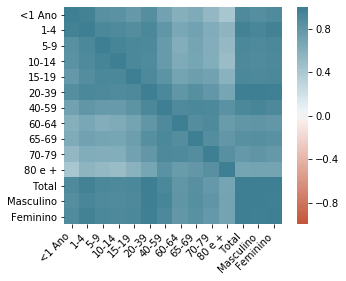

In [147]:
#Plot da matriz de correlação dos dados de incidência de leishmaniose

plot_grid = plt.GridSpec(1, 15, hspace=0.2, wspace=0.1) # Setup a 1x15 grid
ax = plt.subplot(plot_grid[:,:-1])


corrDf = df.drop('Ano',axis=1)

corr = corrDf.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

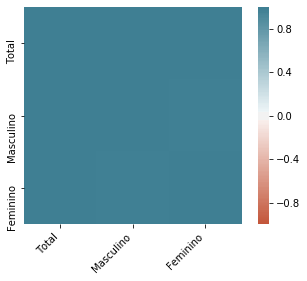

In [138]:
# Nada muito relevante ...

dfCopy = df.copy()

dfCopy = dfCopy.drop(['<1 Ano','1-4','5-9','10-14','15-19','20-39','40-59','60-64','65-69','70-79','80 e +','Ano'],axis=1)

corr = dfCopy.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

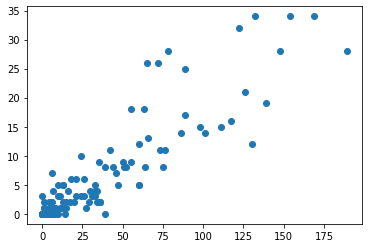

In [139]:
# É bom plotar outras categorias mas ainda estou em dúvida de quantas/quais são necessárias...
plt.scatter(df['20-39'],df['10-14'])


In [140]:
dfCopy = df.copy()
dfCopy = dfCopy.drop(['UF de residência'],axis=1)


### Análise dos componentes principais desses dados com PCA

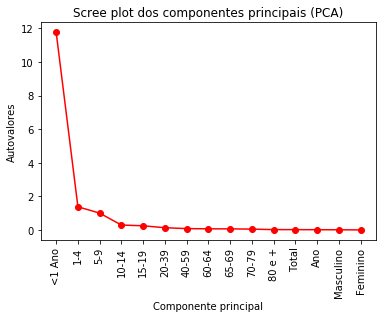

autovetor: 11.674536293605236 e autovalor: 11.773473041856127
autovetor: 1.3664059499766181 e autovalor: 1.3779856614170976
autovetor: 0.9925343871851878 e autovalor: 1.0009456955511642
autovetor: 0.2873397655872294 e autovalor: 0.2897748483464441
autovetor: 0.24455539315181885 e autovalor: 0.24662789648361383
autovetor: 0.12948672158338168 e autovalor: 0.13058406668154546
autovetor: 0.07785625373475791 e autovalor: 0.07851605249522173
autovetor: 0.06382585114588449 e autovalor: 0.06436674818949387
autovetor: 0.06253017172133847 e autovalor: 0.06306008843084182
autovetor: 0.04599140571869711 e autovalor: 0.04638116339427916
autovetor: 0.018481267421484832 e autovalor: 0.01863788833183667
autovetor: 0.01699986366859387 e autovalor: 0.017143930309853506
autovetor: 0.011364820195000944 e autovalor: 0.011461132230552363
autovetor: 0.008091722361282336 e autovalor: 0.008160296279598356
autovetor: 1.3294348783781328e-07 e autovalor: 1.340701277335244e-07


In [141]:
from sklearn.decomposition import PCA
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(dfCopy)
scaled_data = scaler.transform(dfCopy)

pca = PCA()
pca_data = pca.fit_transform(scaled_data)

per_var = np.round(pca.explained_variance_ratio_*100,decimals=1)

#plt.bar(x=range(1,len(per_var)+1),height=per_var,tick_label=dfcopy.columns)
eigenvalues = pca.explained_variance_
plt.plot(dfCopy.columns,eigenvalues,'ro-')

plt.ylabel('Autovalores')
plt.xlabel('Componente principal')
plt.xticks(rotation=90)
plt.title('Scree plot dos componentes principais (PCA)')
plt.show()

eigenvalues = pca.explained_variance_
for eigenvalue, eigenvector in zip(eigenvalues, pca.components_):  
    print("autovetor: {} e autovalor: {}".format(np.dot(eigenvector.T, np.dot(dfCopy.corr(), eigenvector)),eigenvalue))

### De acordo com a análise, o componente '<1 Ano' é o que mais influi na variância destes dados presentes

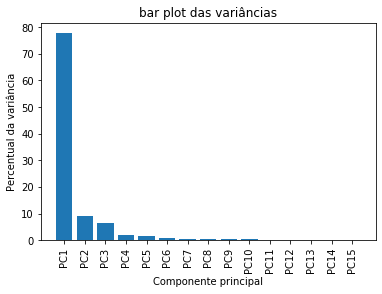

In [143]:
pca_data = pca.fit_transform(scaled_data)

per_var = np.round(pca.explained_variance_ratio_*100,decimals=1)
labels = ['PC' + str(x) for x in range(1,len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1),height=per_var,tick_label=labels)
plt.ylabel('Percentual da variância')
plt.xlabel('Componente principal')
plt.xticks(rotation=90)
plt.title('bar plot das variâncias')
plt.show()

###### ¿TODOS: ? Nível de educação? Gráficos de dispersão ? Estatísticas ambientais regionais ?